In [2]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 5.2 MB/s 
     |████████████████████████████████| 84 kB 4.9 MB/s 
     |████████████████████████████████| 141 kB 64.0 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 57 kB 6.5 MB/s 
     |████████████████████████████████| 2.3 MB 42.0 MB/s 
     |████████████████████████████████| 54 kB 4.0 MB/s 
     |████████████████████████████████| 212 kB 78.8 MB/s 
     |████████████████████████████████| 275 kB 54.6 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 11.3 MB/s 
     |████████████████████████████████| 68 kB 9.4 MB/s 
     |████████████████████████████████| 43 kB 2.8 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 856 kB 70.6

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import gradio as gr

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
! chmod 600 /content/kaggle.json

In [5]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d dedenpermana/dataset-nanas

 19% 5.00M/26.9M [00:00<00:00, 40.7MB/s]
100% 26.9M/26.9M [00:00<00:00, 143MB/s] 


In [6]:
import zipfile
zip_file = zipfile.ZipFile('/content/dataset-nanas.zip')
zip_file.extractall('/content/')

In [7]:
# import pathlib
# dataset_url = "https://download1337.mediafire.com/yhgits6y0kdg/e2l6lqmva4h1ae9/dataset_rempah.zip"
# data_dir = tf.keras.utils.get_file('dataset_rempah', origin=dataset_url, untar=True)
# # data_dir = pathlib.Path(data_dir)
data_dir = '/content/Dataset Nanas'
print(data_dir)

/content/Dataset Nanas


In [8]:
import tensorflow
print(tensorflow.__version__)

2.8.2


In [9]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 3 classes.
Using 210 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 3 classes.
Using 90 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['Nanas Busuk', 'Nanas Masak', 'Nanas Muda']


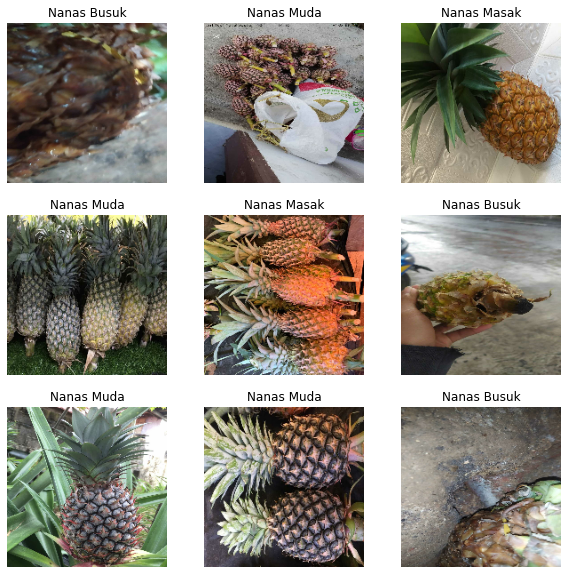

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
 
model=Sequential()

layers.Conv2D(100,(3,3),input_shape=(img_height, img_width, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(3,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 13s 120ms/step - loss: 1641.6262 - accuracy: 0.3619 - val_loss: 479.6509 - val_accuracy: 0.6111
Epoch 2/50
7/7 [==============================] - 1s 77ms/step - loss: 555.2882 - accuracy: 0.3762 - val_loss: 291.4100 - val_accuracy: 0.3222
Epoch 3/50
7/7 [==============================] - 1s 76ms/step - loss: 129.9732 - accuracy: 0.4048 - val_loss: 58.5750 - val_accuracy: 0.4000
Epoch 4/50
7/7 [==============================] - 1s 78ms/step - loss: 30.7591 - accuracy: 0.4762 - val_loss: 16.7388 - val_accuracy: 0.4667
Epoch 5/50
7/7 [==============================] - 1s 75ms/step - loss: 9.3921 - accuracy: 0.5190 - val_loss: 3.7089 - val_accuracy: 0.5556
Epoch 6/50
7/7 [==============================] - 1s 82ms/step - loss: 1.3317 - accuracy: 0.7381 - val_loss: 1.7562 - val_accuracy: 0.5778
Epoch 7/50
7/7 [==============================] - 1s 78ms/step - loss: 0.4338 - accuracy: 0.8381 - val_loss: 1.6004 - val_accuracy: 0.5556
Epoch 8/50
7/7 [======

In [16]:
def predict_image(img):
  img_4d=img.reshape(-1,300,300,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(300,300))
label = gr.outputs.Label(num_top_classes=3)
  
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://35731.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces
